In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import json
import Utils.graphing_helpers
import importlib
importlib.reload(Utils.graphing_helpers)
from Utils.graphing_helpers import (plot_vicsek_phase_diagram, plot_dir_cross_vel_phase_diagram)

In [2]:
phi=0.6
v0 = 0.6
Dr_vals = np.logspace(-2, 0,num=7)
Jv_vals = np.logspace(-2,0,num=7)

J_vals = Jv_vals / v0

In [3]:
def load_statistic_data(value_key, Dr_vals, J_vals, exp_dir):
    statistic_values = []
    for D_r in Dr_vals:
        row_of_values = []
        for J in J_vals:
            single_simulation_stats_filename = os.path.join(exp_dir, "J=%.4f_and_Dr=%.4f"%(J, D_r), 'single_stats.json')
            with open(single_simulation_stats_filename) as stats_file:
                stats = json.loads(stats_file.read())
            row_of_values.append(stats[value_key])
        statistic_values.append(row_of_values)
    statistic_values = np.array(statistic_values)
    return statistic_values

In [4]:
save_dir = "/home/ryanlopez/Velocity_Align_Vary_Phi_V_Cutoff_Saved_Data"
exp_folder_name = "phi=%.4f_and_v0=%.4f"%(phi, v0) #Folder name of experiment directory
exp_dir = os.path.join(save_dir, exp_folder_name)

In [8]:
simulation_desc = r"$\phi=%.2f$, $v_0=%.1e$, k=1, L=70, Simulation Time = $5 \times 10^{5}$"%(phi, v0)
plt_xlabel = r'$Jv_0$'
plt_ylabel = r'$D_r$'

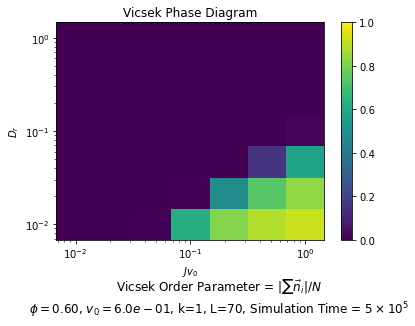

In [10]:
vicsek_vals = load_statistic_data('vicsek_param', Dr_vals, J_vals, exp_dir)
plot_vicsek_phase_diagram(Jv_vals, Dr_vals, vicsek_vals, plt_xlabel=plt_xlabel, plt_ylabel=plt_ylabel, simulation_desc=simulation_desc)

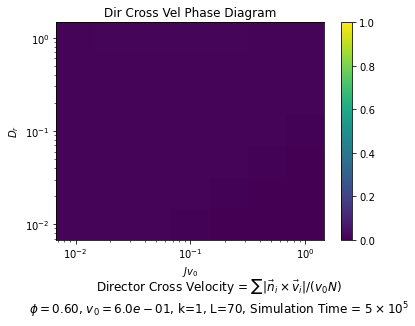

In [15]:
dir_cross_vel_vals = load_statistic_data('dir_cross_vel', Dr_vals, J_vals, exp_dir)
plot_dir_cross_vel_phase_diagram(Jv_vals, Dr_vals, dir_cross_vel_vals, plt_xlabel=plt_xlabel, plt_ylabel=plt_ylabel, 
                                simulation_desc=simulation_desc)